In [11]:
from scipy import stats
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv(f"~/Desktop/snpEff_local/temp_outputs/594_posi")
df

,POS
0,7813
1,7823
2,7846
3,7852
4,7943
...,...
402495,52965202
402496,53025134
402497,53025572
402498,53099165


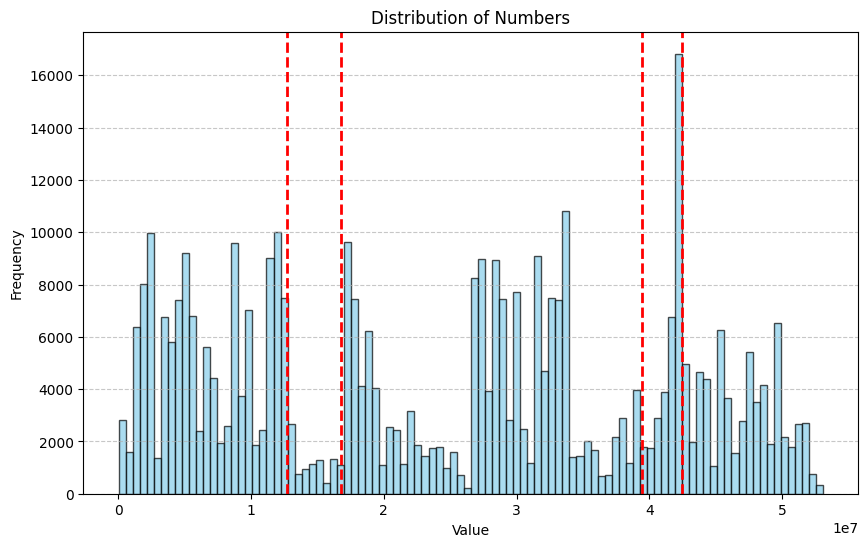

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df["POS"].to_list(), bins=100, color='skyblue', edgecolor='black', alpha=0.7)  
plt.axvline(x=39429440, color='red', linestyle='--', linewidth=2, label='x = 4')
plt.axvline(x=42445994, color='red', linestyle='--', linewidth=2, label='x = 4')
plt.axvline(x=12702886, color='red', linestyle='--', linewidth=2, label='x = 4')
plt.axvline(x=16793794, color='red', linestyle='--', linewidth=2, label='x = 4')
plt.title('Distribution of Numbers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [43]:
chr="610"
df=pd.read_csv(f"~/Desktop/snpEff/{chr}.csv", header=None)
df_inv=pd.read_csv(f"~/Desktop/snpEff/{chr}_inv.csv", header=None)
df_inv

,0
0,17000.000
1,1.000
2,589.000
3,188.000
4,189.000
5,0.000
6,504.000
7,2112.000
8,0.375
9,9900.000


In [44]:
df

,0
0,409522.0000
1,271.0000
2,51469.0000
3,20044.0000
4,20093.0000
5,160.0000
6,44624.0000
7,87.0000
8,0.4503
9,156915.0000


In [45]:
total_snps = int(df.iloc[0][0])
inversion_snps = int(df_inv.iloc[0][0])
total_outside = total_snps - inversion_snps

total_intergenic = int(df.iloc[-1][0])
inversion_intergenic = int(df_inv.iloc[-1][0])
outside_intergenic = total_intergenic - inversion_intergenic

total_outside = total_outside - outside_intergenic
inversion_snps = inversion_snps - inversion_intergenic

values_total = np.array(df.iloc[1:7][0].tolist()).astype(int)
values_inverted = np.array(df_inv.iloc[1:7][0].tolist()).astype(int)
values_outside = values_total - values_inverted
print(values_outside)

value_labels = ["high_impact", "low_impact", "moderate_impact", "missense", "nonsense", "silent"]

#took out modifier: "Usually non-coding variants or variants affecting non-coding genes, where predictions are difficult or there is no evidence of impact."

print("Variants rate: ", df.iloc[-3][0], " vs ", df_inv.iloc[-3][0])
print("Missense / Silent ratio: ", df.iloc[-2][0], " vs ", df_inv.iloc[-2][0])

expected_values = []
for i in range(len(values_total)):
    print(value_labels[i])
    prob = (values_outside[i])/total_outside #probability of high impact in the background
    n = inversion_snps #number of coins I flipped, each SNP in inversion could be high impact
    k = values_inverted[i] #successfully finding high impact

    if k >= n:
        print("less SNP - intergenic than impact of interest number of SNPs!")
        #NOTE num SNPs per impact level don't add up to total number of SNPs, > than that
        k = n

    print(f"Expected : {n*prob}")
    print(f"Got: {k}")

    expected_values.append(n*prob)

    result=stats.binomtest(k, n, prob, alternative='greater') # less means what are the chances that k is less than n * p
    print(result.pvalue)
    result=stats.binomtest(k, n, prob, alternative='less') # less means what are the chances that k is less than n * p
    print(result.pvalue)
    result=stats.binomtest(k, n, prob, alternative='two-sided') # less means what are the chances that k is less than n * p
    print(result.pvalue)

    print("----------------------")

# High impact: more than expected! 4.65 vs 15, p < 0.001
# Low impact: less than expected! 500.34 vs 369, p < 0.001
# Moderate impact: more than expected! 268.28 vs 545, p < 0.001

# Missense: more than expected! 269.11 vs 550, p < 0.001     #different amino acids
# Nonsense: more than expected! 2.5 vs 6, p = 0.042          #premature stop
# Silent: less than expected! 436.62 vs 327, p < 0.001       #no effect on the amino acid

#two-sided p-vals were also significant

# In the paper: "Ignoring intergenic regions to avoid confounding effects from gene density"...
# As in, could have more missense because there are more SNPs in genes due to higher gene density.
# However, in our case, inversion has more SNPs that are intergenic actually, 51.7% vs 26.1 % in the whole chromosome. 
# Exonic in inversion is 6.6%, for the whole 8%. so there are less candidate SNPs in inversion yet there are more that are missense. 
# included in above calculation

[  270 50880 19856 19904   160 44120]
Variants rate:  87.0  vs  2112.0
Missense / Silent ratio:  0.4503  vs  0.375
high_impact
Expected : 7.808331330674889
Got: 1
0.9995954066809903
0.003567270209289151
0.006482615858436354
----------------------
low_impact
Expected : 1471.436659647179
Got: 589
1.0
6.29527845456179e-180
1.2649065664919188e-179
----------------------
moderate_impact
Expected : 574.2304700069651
Got: 188
1.0
1.5475330935589315e-83
2.6176834974417633e-83
----------------------
missense
Expected : 575.6186177990852
Got: 189
1.0
1.8090404132391717e-83
3.754891695852303e-83
----------------------
nonsense
Expected : 4.627159307066601
Got: 0
1.0
0.009767763526699396
0.017847326503186815
----------------------
silent
Expected : 1275.9391789236151
Got: 504
1.0
1.6588104619381599e-155
3.0094284716066287e-155
----------------------
